In [16]:
getwd()
setwd('/home/alek/FACE/DATA/spatial_codes')
getwd()

[1] "/home/alek/FACE/DATA/spatial_codes"

[1] "/home/alek/FACE/DATA/spatial_codes"

In [17]:
df <- read.csv("C01939A6_processed_500_morans.csv")

In [18]:
genes_of_interest <- c("ALX1", "BARX1", "C1orf61", "DLX2", "DLX3", "DLX5", "DLX6-AS1", "SATB2-AS1",
                       "EBF3", "EGR1", "EMX2", "FOXC1", "FOXC2", "FOXD1", "FOXE3", "FOXF2", "FOXG1",
                       "FOXL2", "FOXP2", "GATA2", "GATA3", "HAND1", "HIC1", "HMX1", "ID2", "ID3",
                       "IRX3", "IRX5", "MAFB", "MEOX1", "MEOX2", "MKX", "MOXD1", "MSX1", "NR5A2",
                       "OSR1", "OSR2", "PAX1", "PAX3", "PAX9", "PHOX2B", "PITX1", "PITX2", "POU3F3",
                       "PROX1", "PRRX1", "SCX", "SHOX", "SIX1", "SIX2", "SOX2", "TBX3", "TFAP2B",
                       "TWIST2", "ZIC1", "ZIC2", "ZNF503", "ZNF804A", "PAX6", "PAX7", "HAND2", "IRX1",
                       "MSX2", "NEUROD1", "SHOX2", "INSM2", "MYOG", "NKX3-2", "POU3F4", "TLX3",
                       "NR2F1", "TRPS1", "HDAC9", "H3F3B", "PRDM6", "SIM2", "DACH1", "VGLL3", "MAB21L2")

In [19]:
genes_present <- intersect(genes_of_interest, colnames(df))

# subset
df_tf <- df[, genes_present, drop = FALSE]


corrplot 0.95 loaded



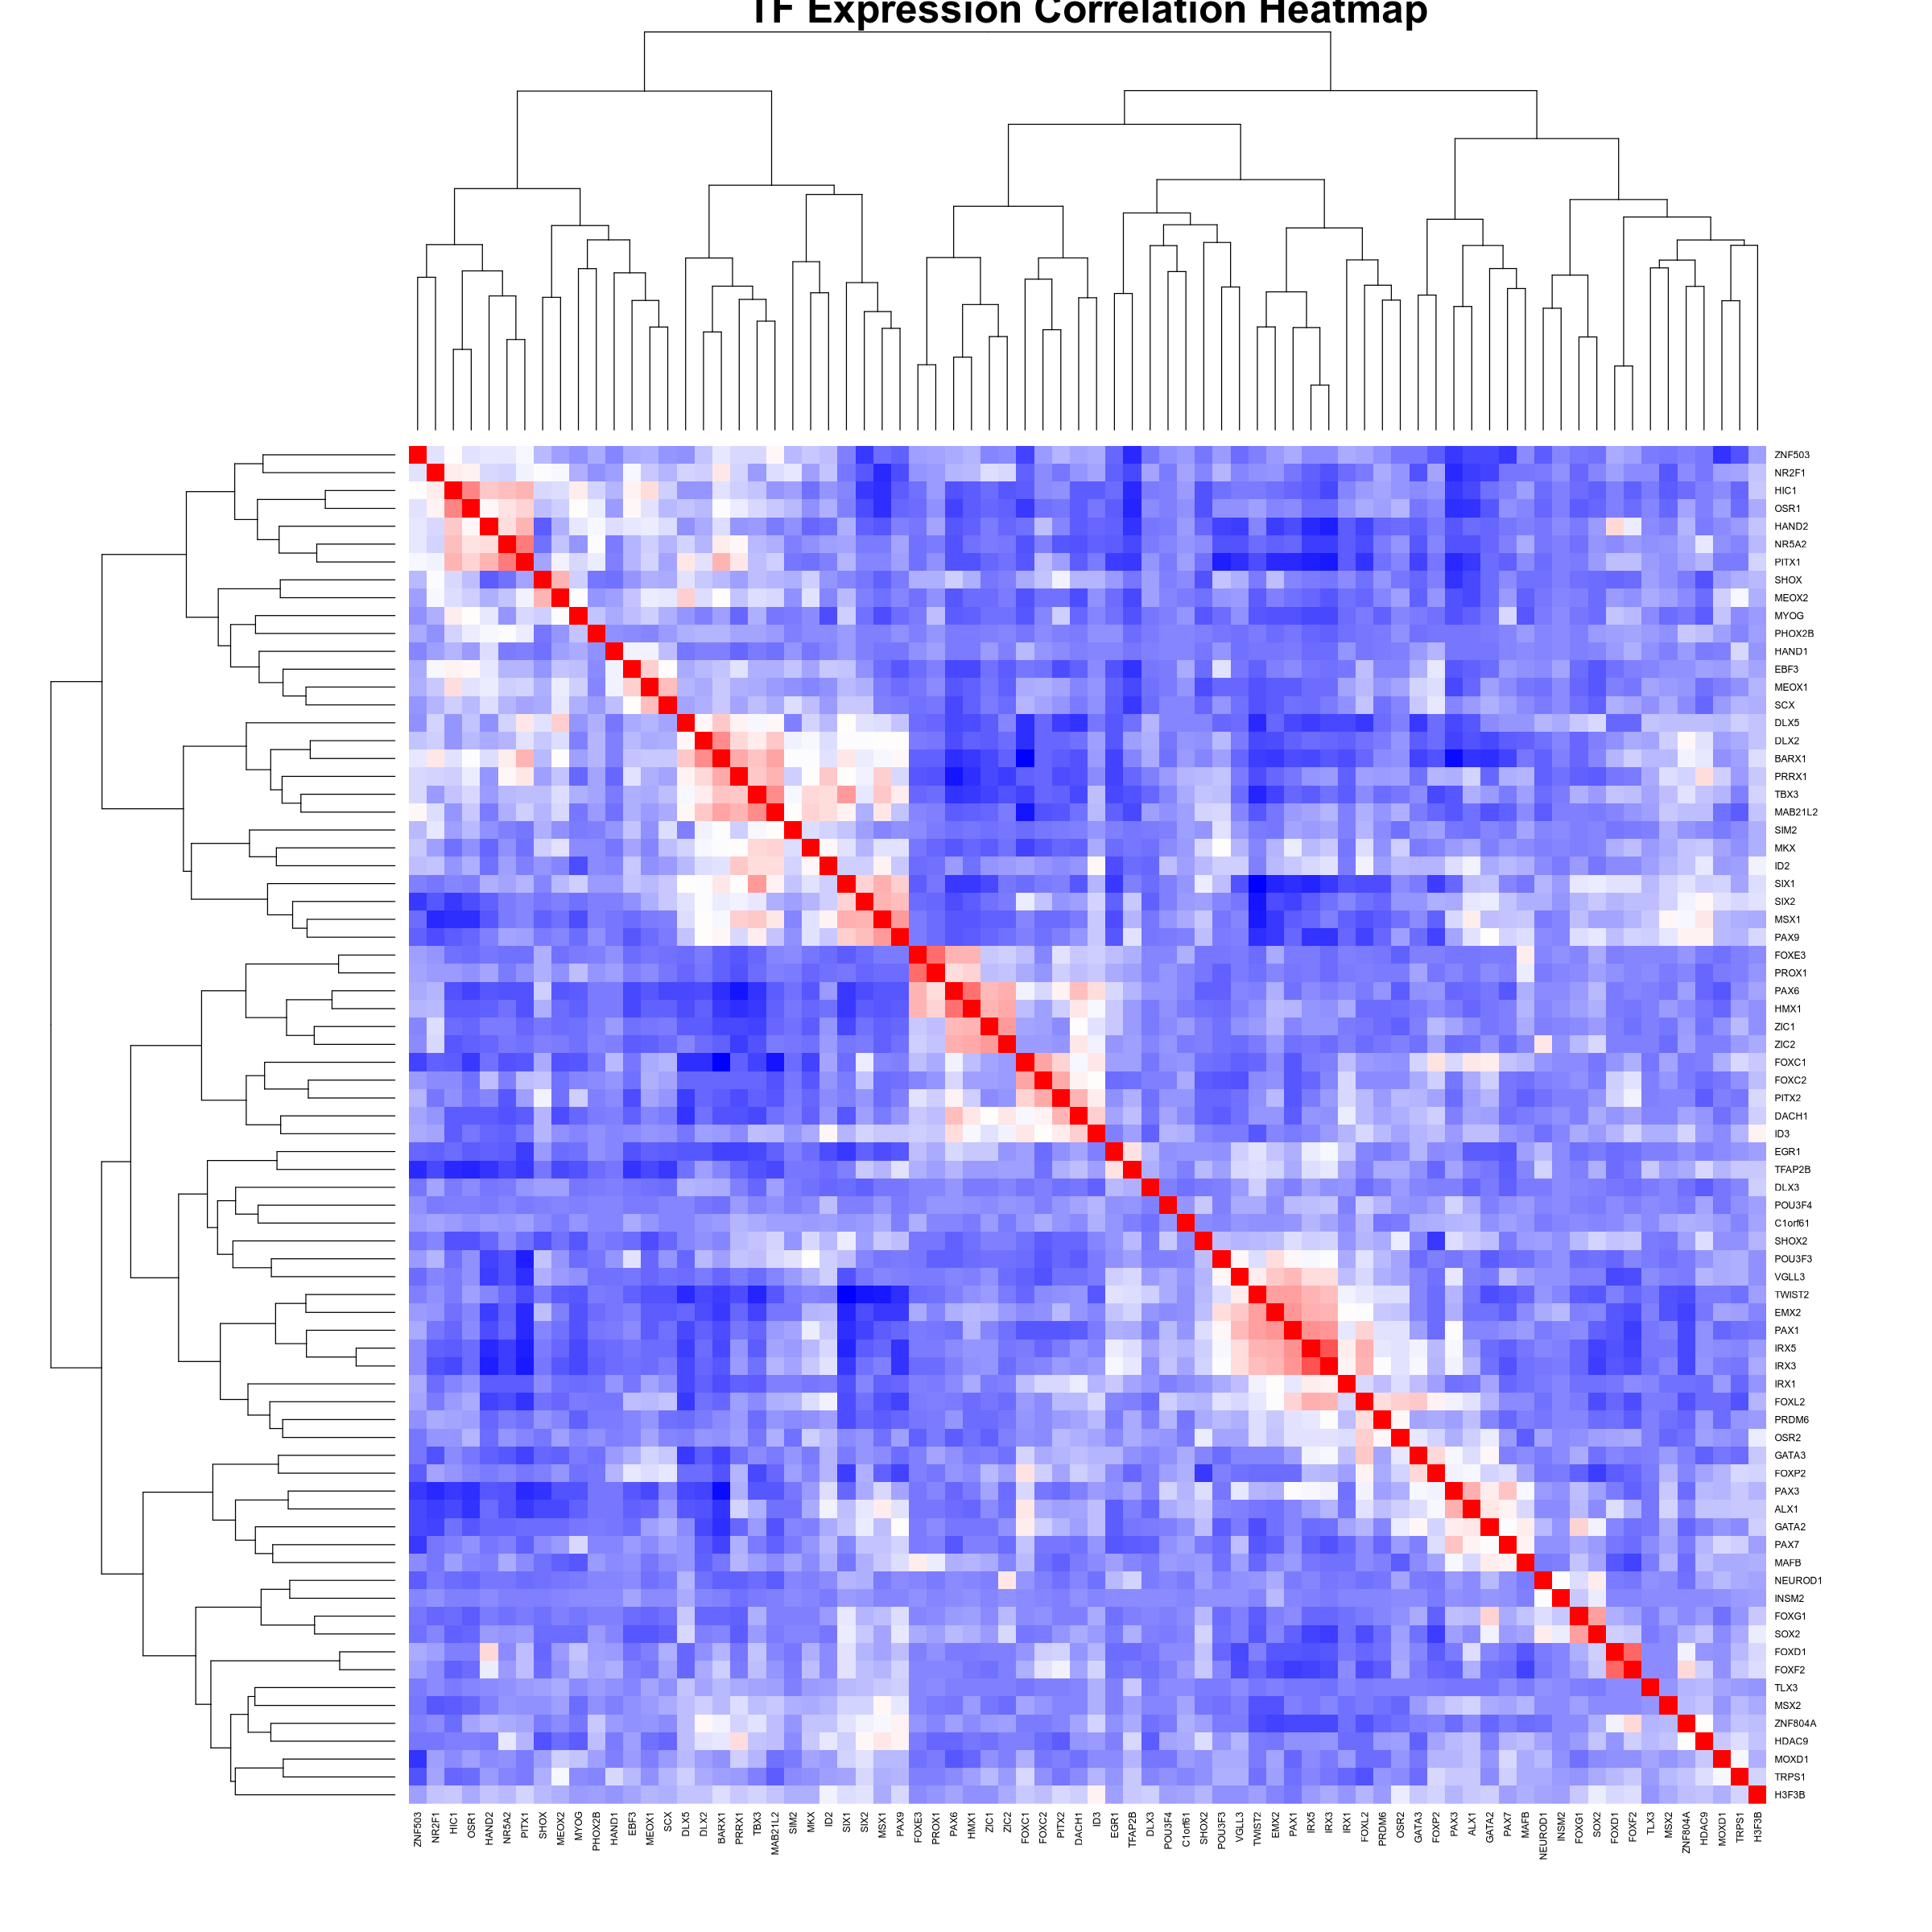

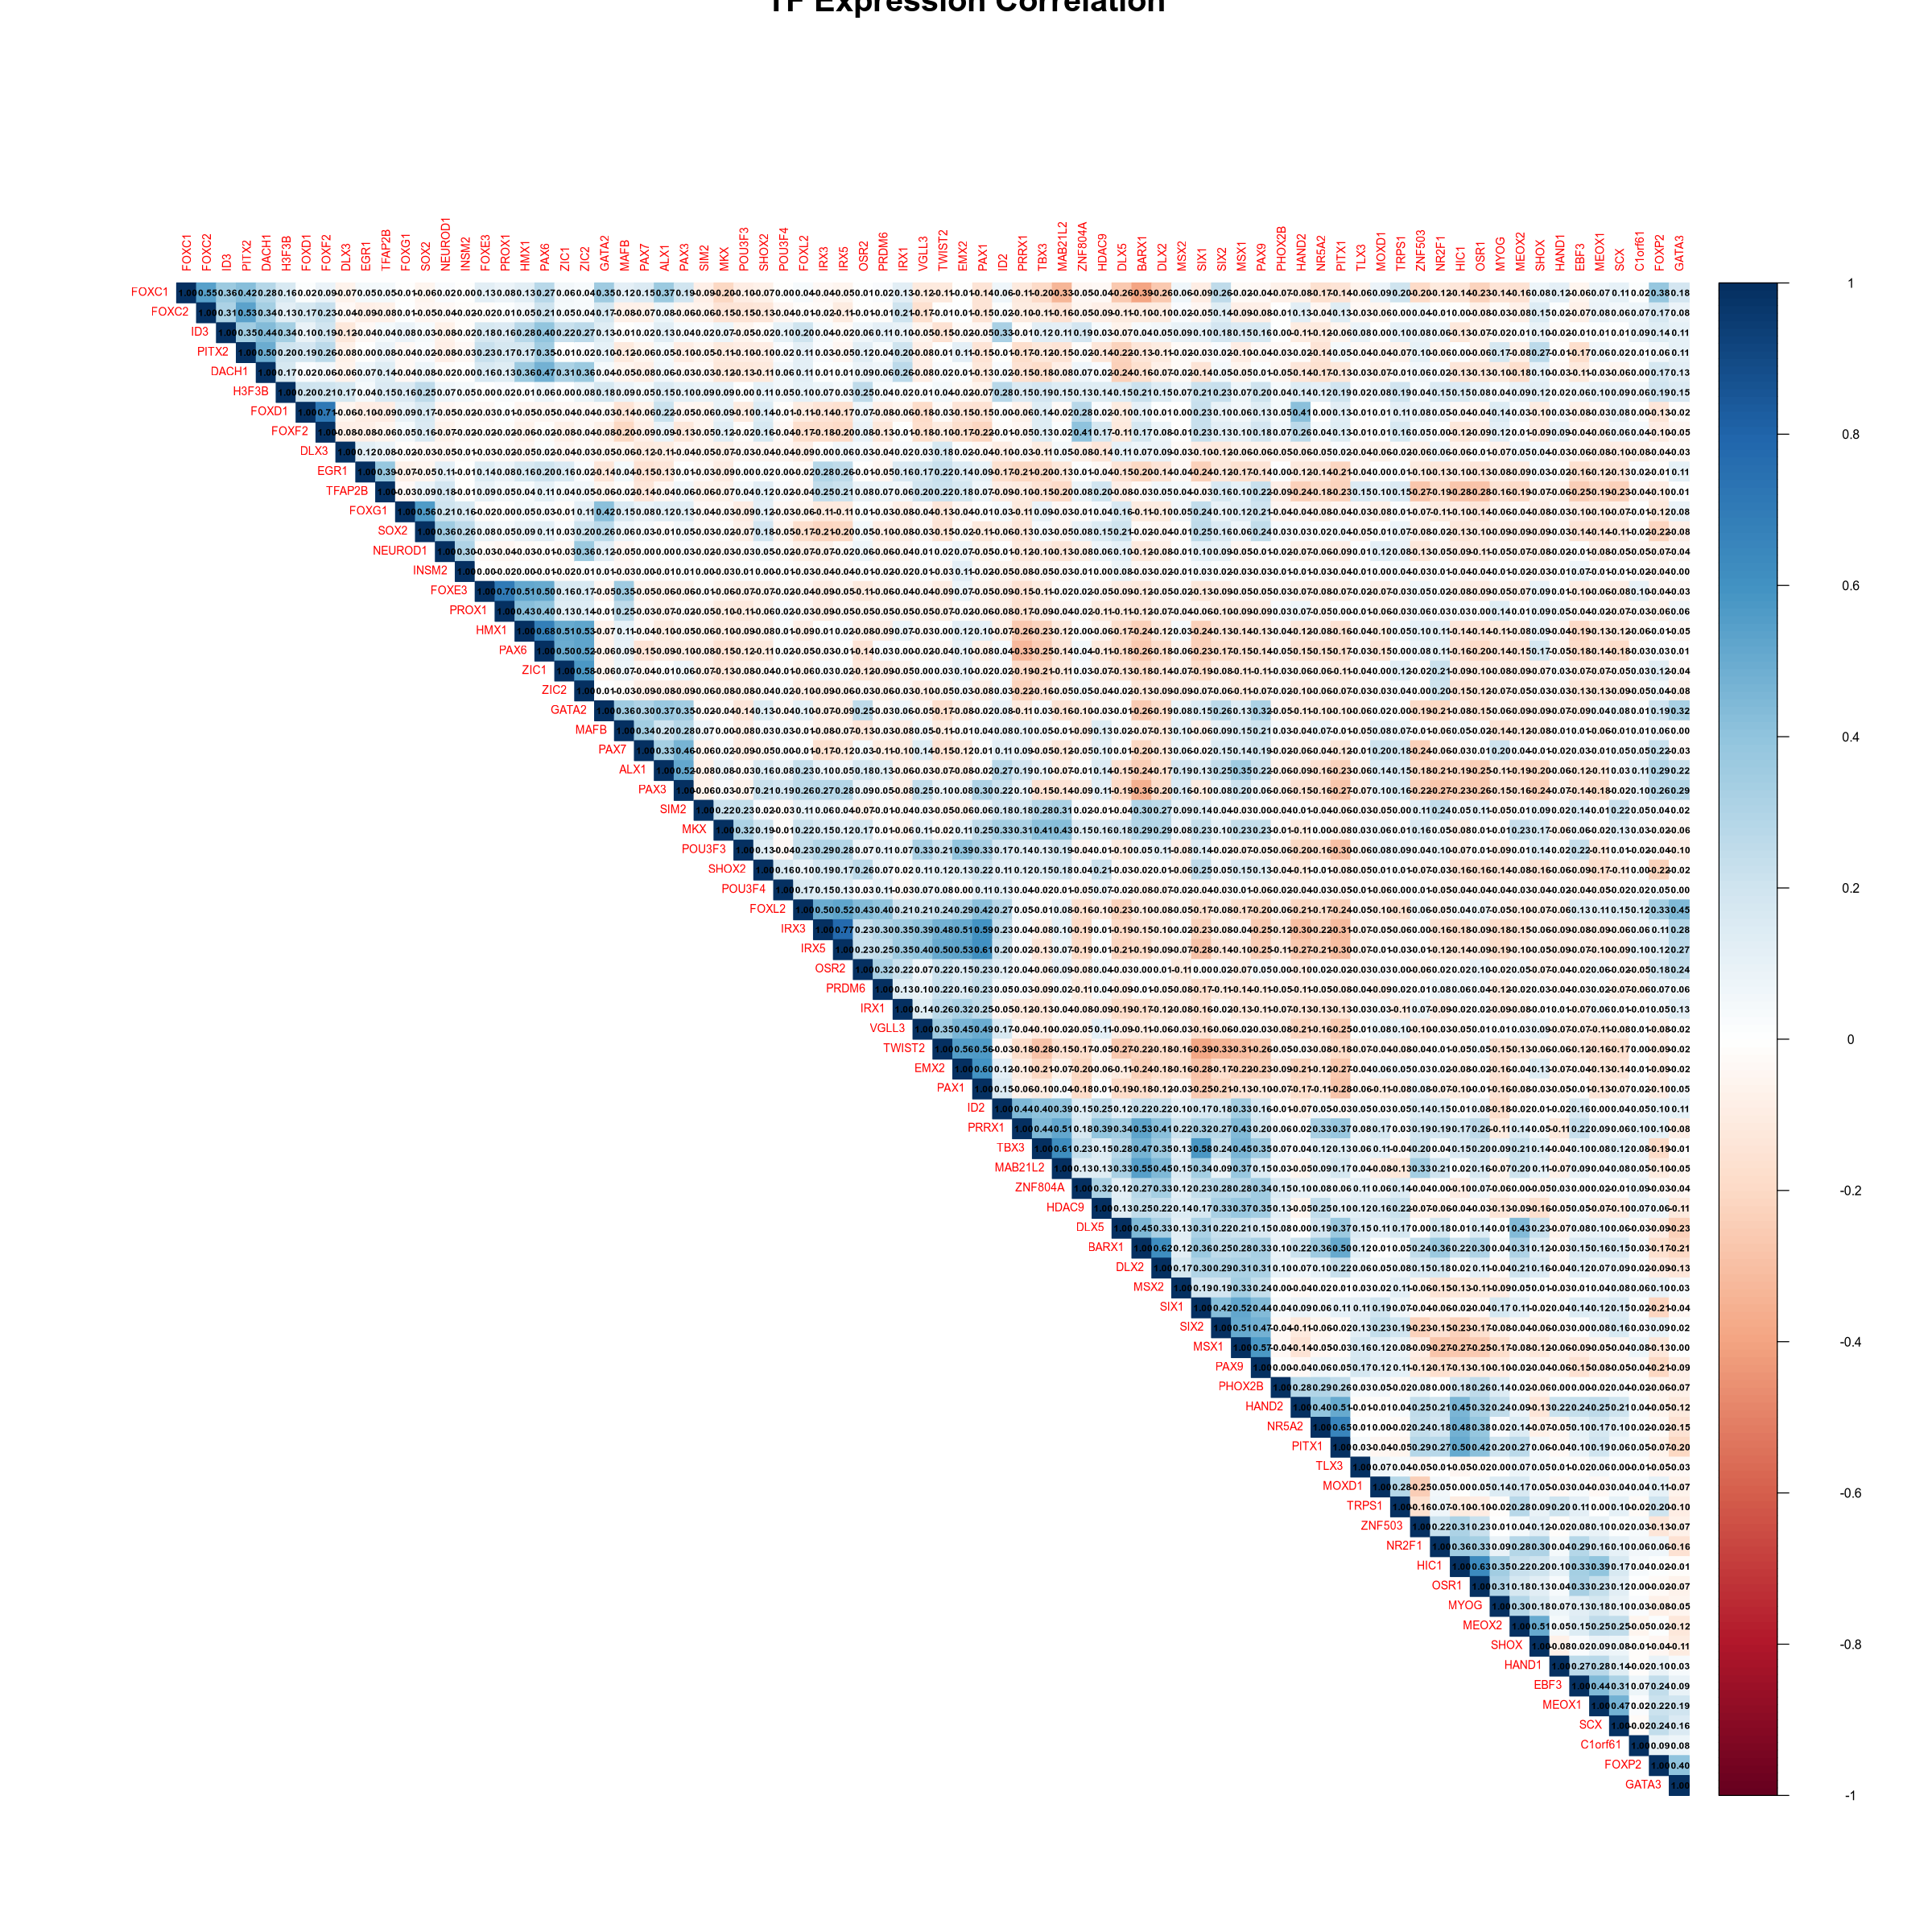

In [20]:
# assuming df_tf is your subsetted data.frame of TFs

options(repr.plot.width=20, repr.plot.height=20)

# 1. Compute pairwise Pearson correlations (ignoring NAs)
cor_mat <- cor(df_tf, use = "pairwise.complete.obs", method = "pearson")



my_palette <- colorRampPalette(c("blue","white","red"))(n = 100)


par(
  cex.main = 2,   # title
  cex.lab  = 2, # axis labels
  cex.axis = 1.5  # tick labels
)

heatmap(
  cor_mat,
  col     = my_palette,
  symm    = TRUE,
  margins = c(8,8),
  main    = "TF Expression Correlation Heatmap"
)



# 2b. Or, using corrplot for a prettier plot
library(corrplot)

corrplot(cor_mat, 
         method = "color", 
         type = "upper", 
         order = "hclust",
         tl.cex = 0.7, 
         addCoef.col = "black", 
         number.cex = 0.6,
         main = "TF Expression Correlation")

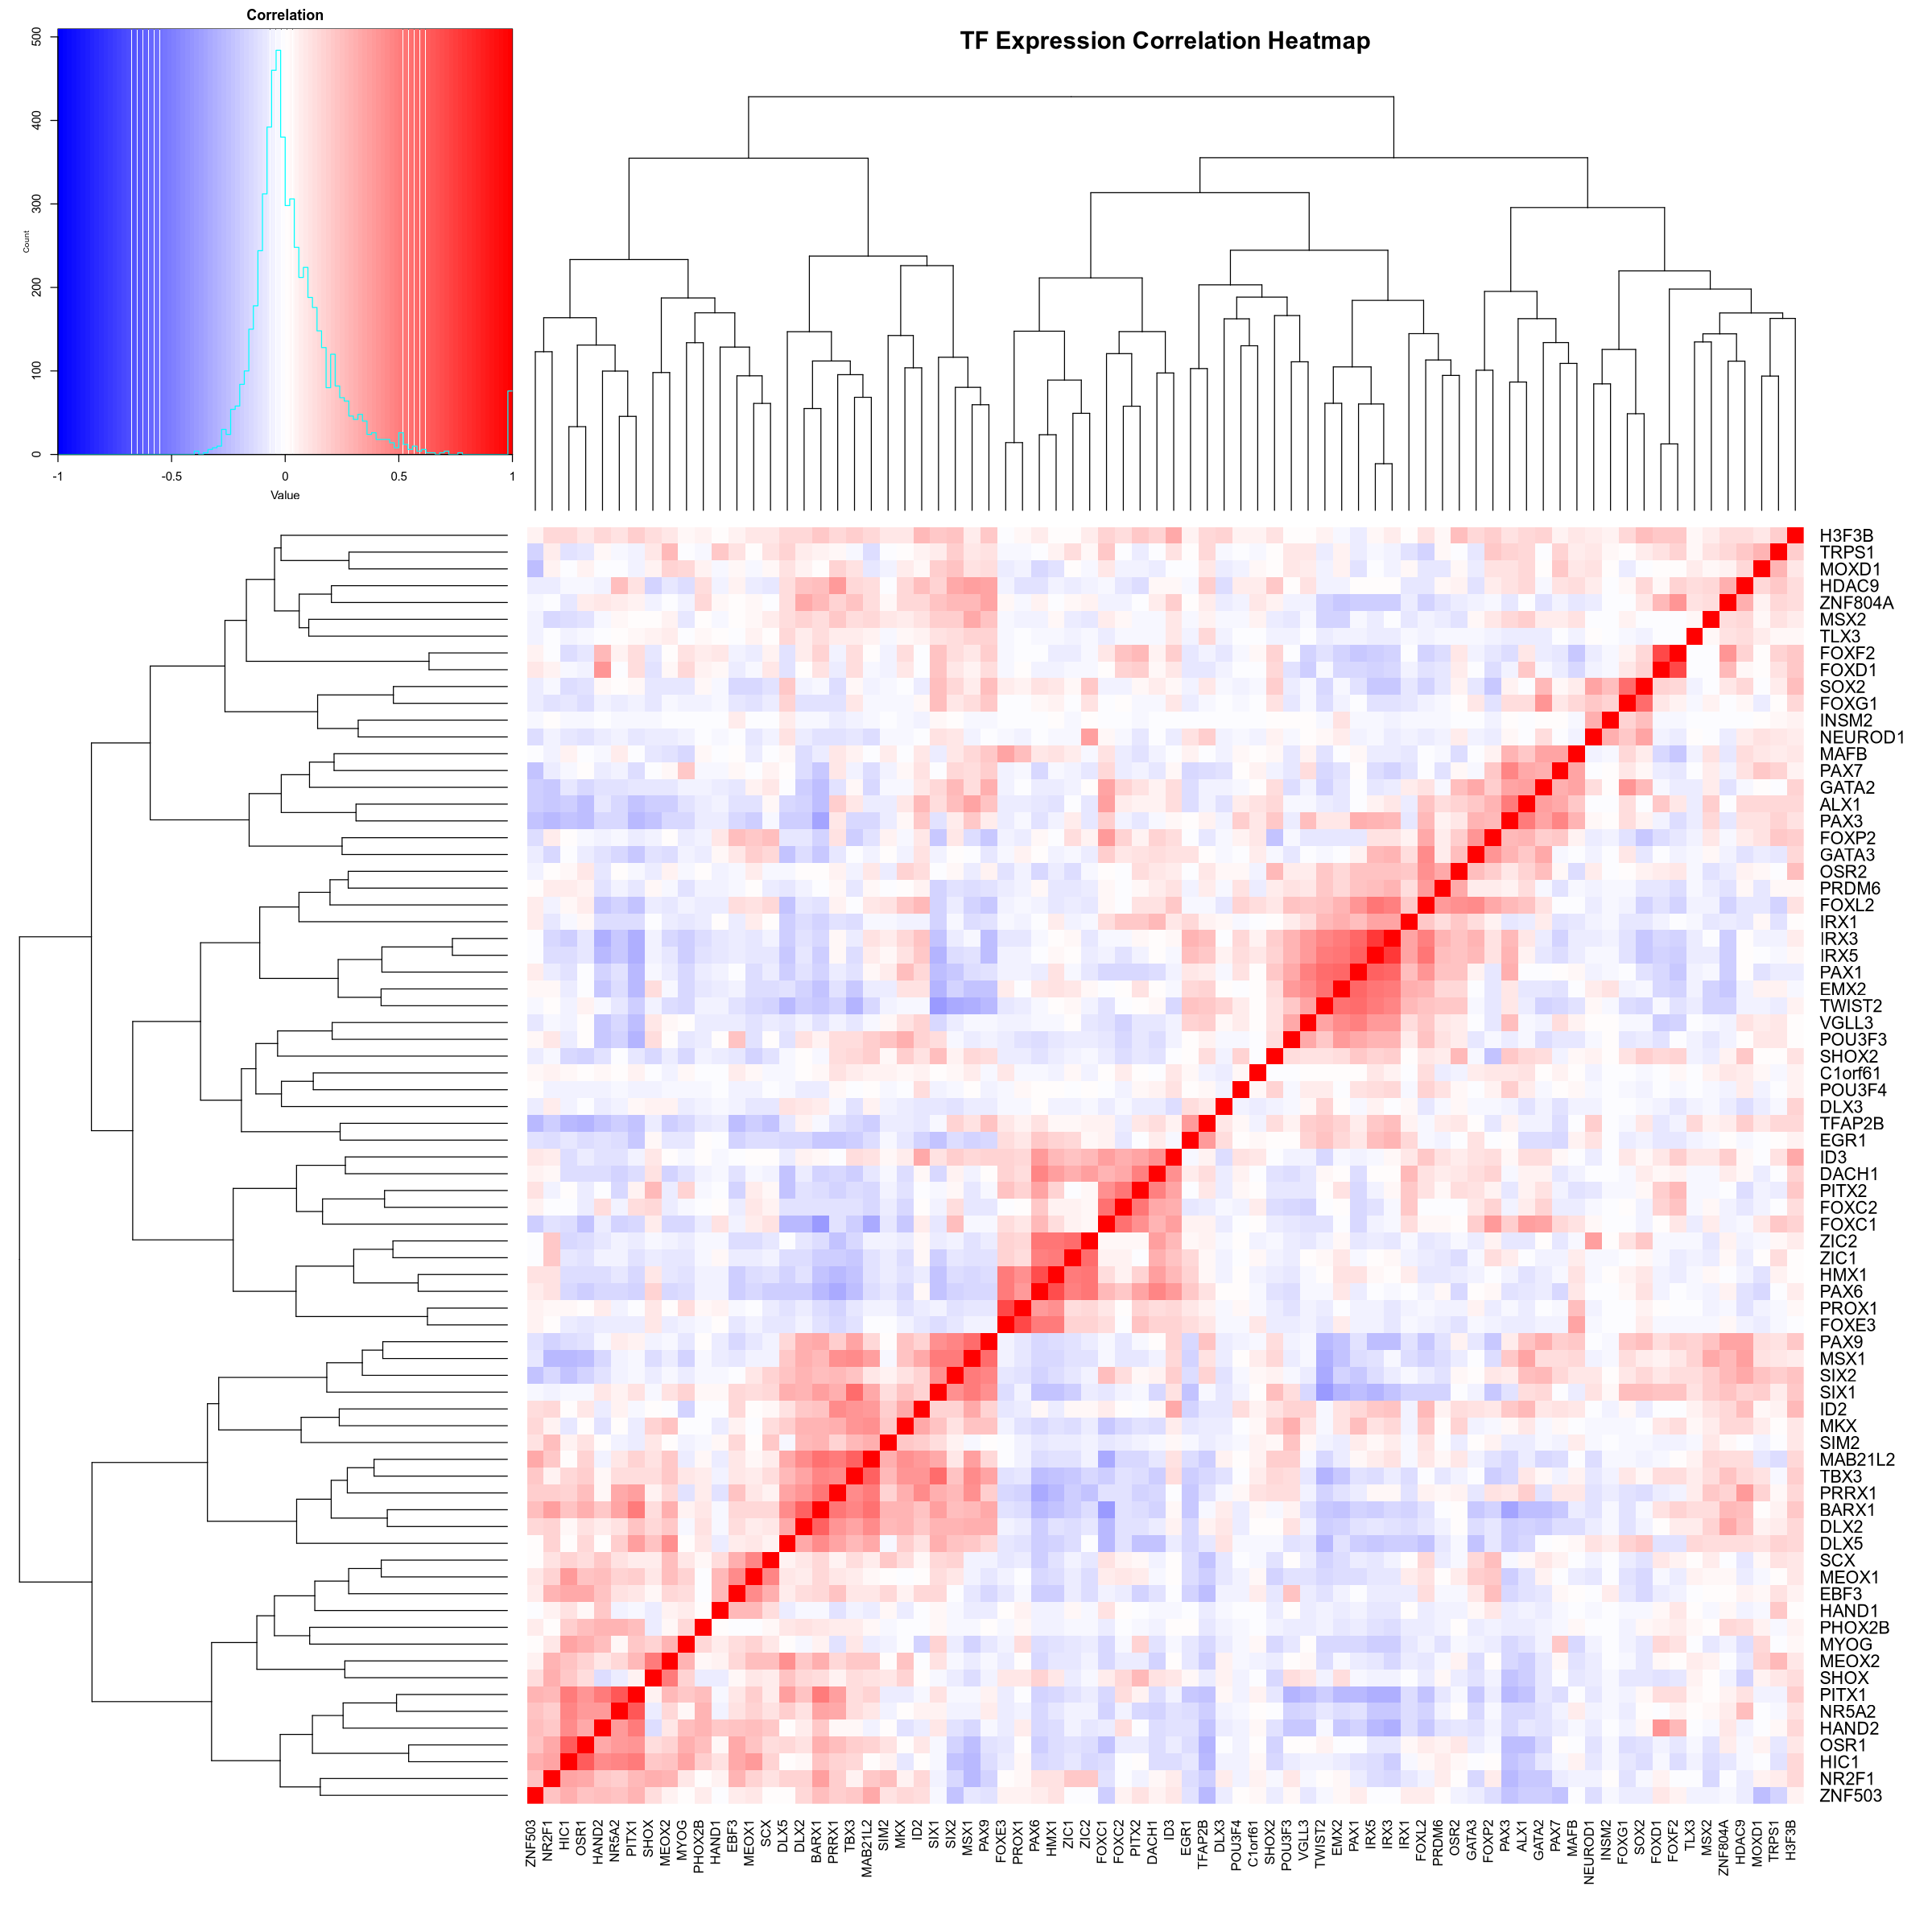

In [21]:
library(gplots)
heatmap.2(
  cor_mat,
  col      = my_palette,
  trace    = "none",
  cexRow   = 1.3,  # row label size
  cexCol   = 1,  # column label size
  key.title= "Correlation",
  main     = "TF Expression Correlation Heatmap",
  margins  = c(8,8)
)

In [22]:
# 1. compute distance & clustering
dist_mat <- as.dist(1 - cor_mat)
hc       <- hclust(dist_mat, method = "average")

# 2. decide how many modules you want
k        <- 25    # <–– change this to your desired number of modules

# 3. cut the tree
modules  <- cutree(hc, k = k)

# 4. split gene names by module
gene_modules <- split(names(modules), modules)

# 5. pad each list to the same length and bind into a data.frame
max_len <- max(lengths(gene_modules))
module_df <- data.frame(
  lapply(gene_modules, function(g) {
    length(g) <- max_len
    g
  }),
  stringsAsFactors = FALSE
)

# 6. (optional) rename columns to "Module1", "Module2", …
colnames(module_df) <- paste0("Module", seq_along(gene_modules))

# View your modules
print(module_df)


   Module1 Module2 Module3 Module4 Module5 Module6 Module7 Module8 Module9
1     ALX1   BARX1 C1orf61    DLX3    DLX5    EBF3    EGR1    EMX2   FOXC1
2    GATA2    DLX2    <NA>    <NA>   MEOX2   MEOX1  TFAP2B    IRX3   FOXC2
3     MAFB     ID2    <NA>    <NA>    SHOX     SCX    <NA>    IRX5     ID3
4     PAX3     MKX    <NA>    <NA>    <NA>    <NA>    <NA>    PAX1   PITX2
5     PAX7    MSX1    <NA>    <NA>    <NA>    <NA>    <NA>  POU3F3   DACH1
6     <NA>    PAX9    <NA>    <NA>    <NA>    <NA>    <NA>  TWIST2    <NA>
7     <NA>   PRRX1    <NA>    <NA>    <NA>    <NA>    <NA>    IRX1    <NA>
8     <NA>    SIX1    <NA>    <NA>    <NA>    <NA>    <NA>   VGLL3    <NA>
9     <NA>    SIX2    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>
10    <NA>    TBX3    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>
11    <NA>   HDAC9    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>
12    <NA> MAB21L2    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>
   Module10 Module11 Modu

In [23]:
# write modules to CSV in your working directory
write.csv(module_df,
          file      = "gene_modules.csv",
          row.names = FALSE,
          quote     = FALSE)


Rows (in heatmap order):
H3F3B
TRPS1
MOXD1
HDAC9
ZNF804A
MSX2
TLX3
FOXF2
FOXD1
SOX2
FOXG1
INSM2
NEUROD1
MAFB
PAX7
GATA2
ALX1
PAX3
FOXP2
GATA3
OSR2
PRDM6
FOXL2
IRX1
IRX3
IRX5
PAX1
EMX2
TWIST2
VGLL3
POU3F3
SHOX2
C1orf61
POU3F4
DLX3
TFAP2B
EGR1
ID3
DACH1
PITX2
FOXC2
FOXC1
ZIC2
ZIC1
HMX1
PAX6
PROX1
FOXE3
PAX9
MSX1
SIX2
SIX1
ID2
MKX
SIM2
MAB21L2
TBX3
PRRX1
BARX1
DLX2
DLX5
SCX
MEOX1
EBF3
HAND1
PHOX2B
MYOG
MEOX2
SHOX
PITX1
NR5A2
HAND2
OSR1
HIC1
NR2F1
ZNF503

Columns (in heatmap order):
H3F3B
TRPS1
MOXD1
HDAC9
ZNF804A
MSX2
TLX3
FOXF2
FOXD1
SOX2
FOXG1
INSM2
NEUROD1
MAFB
PAX7
GATA2
ALX1
PAX3
FOXP2
GATA3
OSR2
PRDM6
FOXL2
IRX1
IRX3
IRX5
PAX1
EMX2
TWIST2
VGLL3
POU3F3
SHOX2
C1orf61
POU3F4
DLX3
TFAP2B
EGR1
ID3
DACH1
PITX2
FOXC2
FOXC1
ZIC2
ZIC1
HMX1
PAX6
PROX1
FOXE3
PAX9
MSX1
SIX2
SIX1
ID2
MKX
SIM2
MAB21L2
TBX3
PRRX1
BARX1
DLX2
DLX5
SCX
MEOX1
EBF3
HAND1
PHOX2B
MYOG
MEOX2
SHOX
PITX1
NR5A2
HAND2
OSR1
HIC1
NR2F1
ZNF503


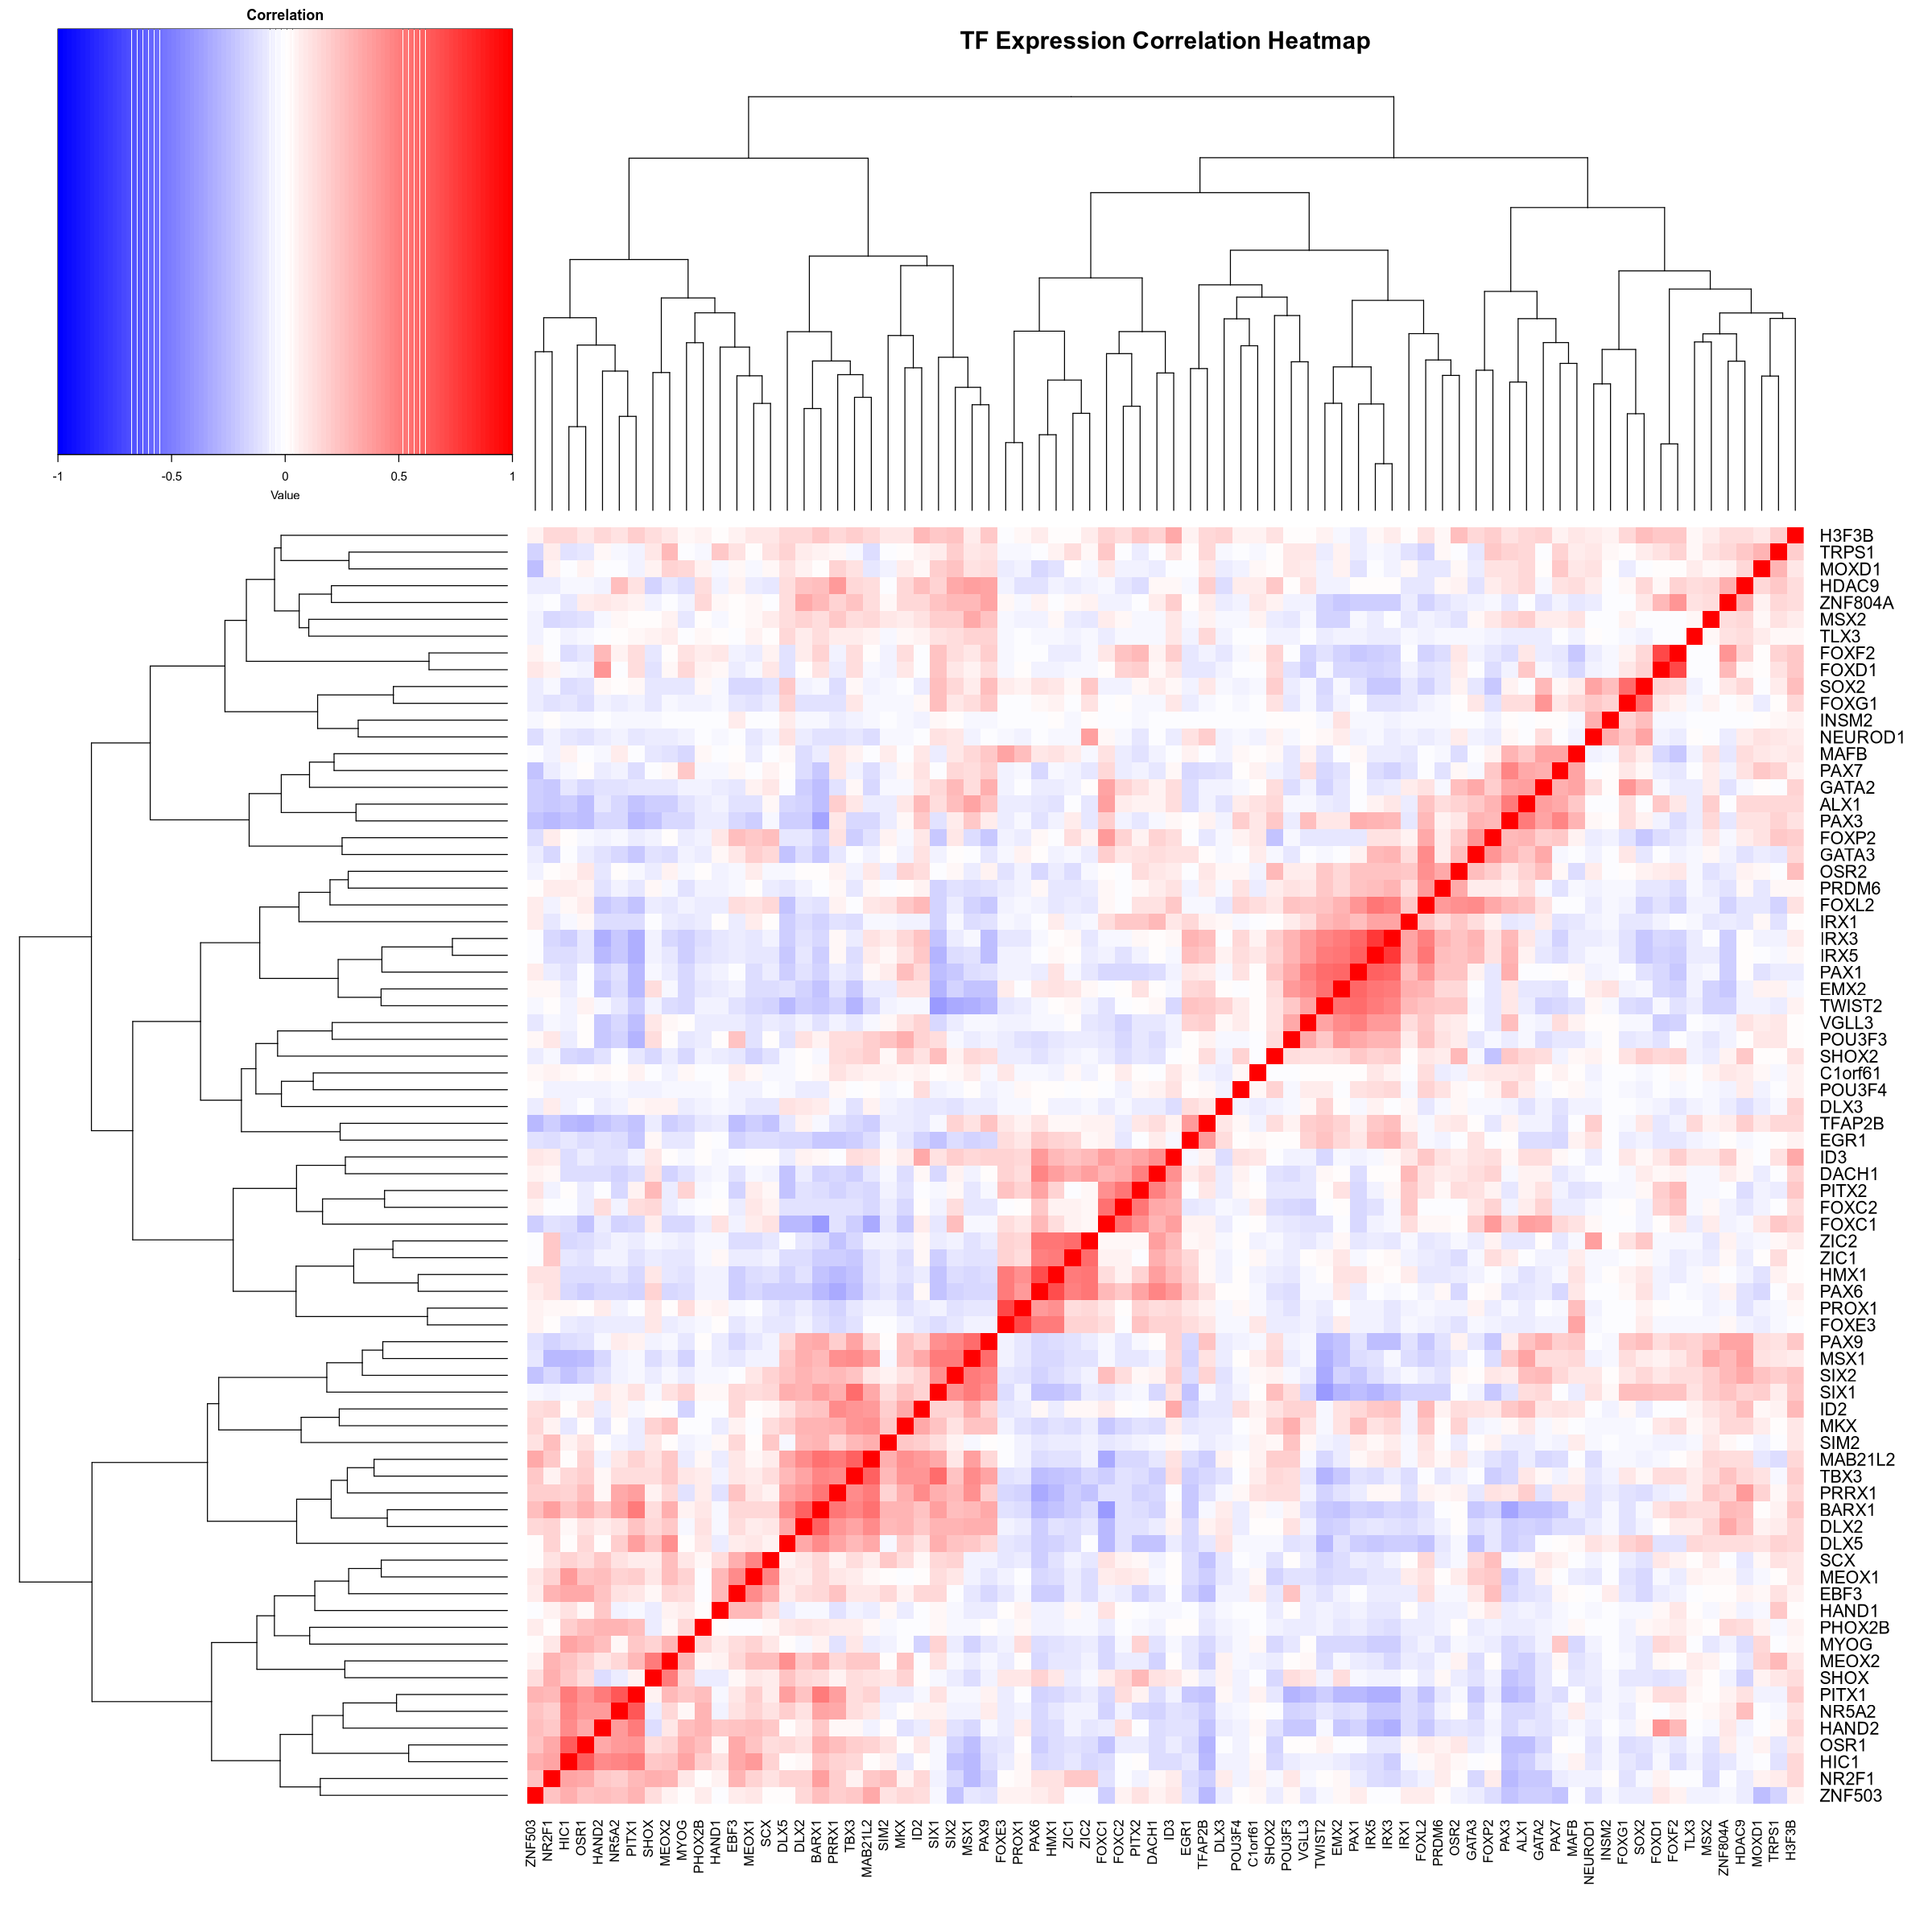

In [24]:
library(gplots)

# run heatmap.2 and save its return value
hm <- heatmap.2(
  cor_mat,
  col      = my_palette,
  trace    = "none",
  cexRow   = 1.3,
  cexCol   = 1,
  key.title= "Correlation",
  main     = "TF Expression Correlation Heatmap",
  margins  = c(8,8),
  dendrogram = "both",   # make sure both dendrograms are used
  Colv = TRUE,
  Rowv = TRUE,
  density.info = "none"
)

# extract labels in the order plotted
row_labels <- rev(rownames(cor_mat)[ hm$rowInd ])
col_labels <- rev(colnames(cor_mat)[ hm$colInd ])

# print as text
cat("Rows (in heatmap order):\n")
cat(row_labels, sep = "\n")

cat("\nColumns (in heatmap order):\n")
cat(col_labels, sep = "\n")


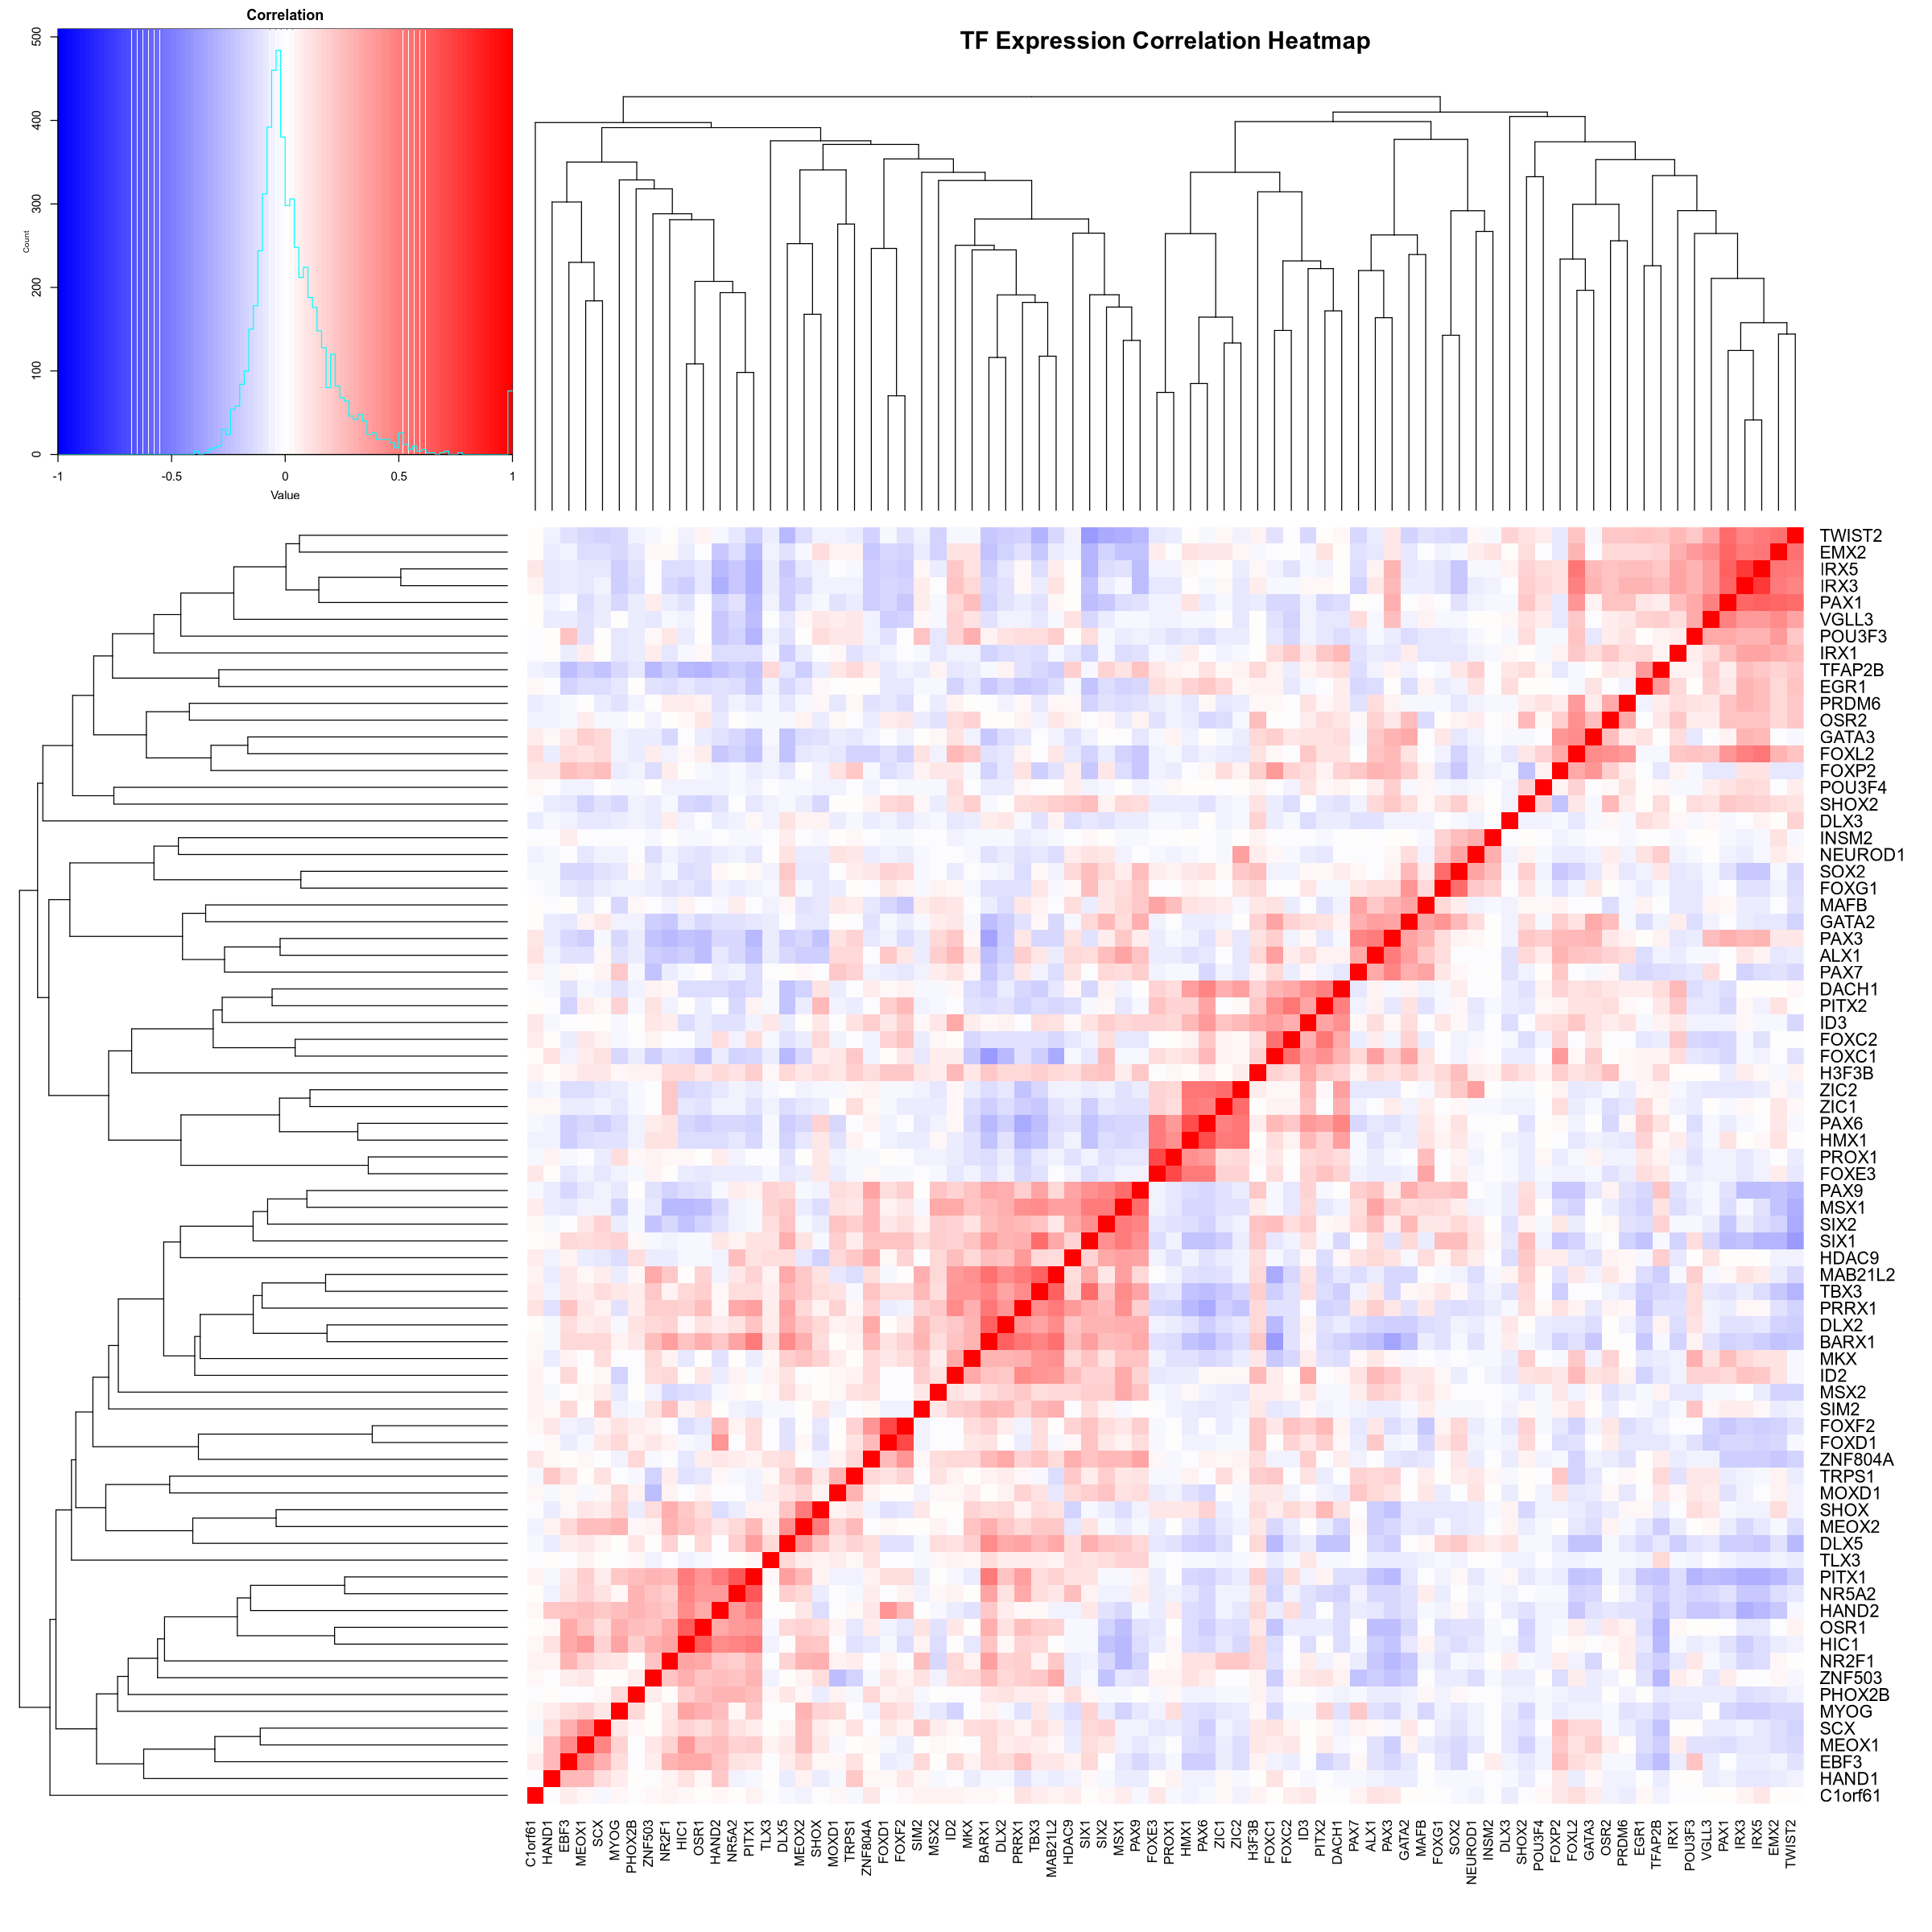

In [25]:
# 1. compute your distance & clustering once
dist_mat <- as.dist(1 - cor_mat)
hc       <- hclust(dist_mat, method = "average")

# 2. turn that into a dendrogram
dend <- as.dendrogram(hc)

# 3. feed it back into heatmap.2
library(gplots)
heatmap.2(
  cor_mat,
  col        = my_palette,
  trace      = "none",
  Rowv       = dend,
  Colv       = dend,
  dendrogram = "both",
  cexRow     = 1.3,
  cexCol     = 1,
  key.title  = "Correlation",
  main       = "TF Expression Correlation Heatmap",
  margins    = c(8,8)
)

# 4. now your modules will match that same tree
modules <- cutree(hc, k = 30)


In [26]:
# 4. split gene names by module
gene_modules <- split(names(modules), modules)

# 5. pad each list to the same length and bind into a data.frame
max_len <- max(lengths(gene_modules))
module_df <- data.frame(
  lapply(gene_modules, function(g) {
    length(g) <- max_len
    g
  }),
  stringsAsFactors = FALSE
)

# 6. (optional) rename columns to "Module1", "Module2", …
colnames(module_df) <- paste0("Module", seq_along(gene_modules))

# View your modules
print(module_df)

  Module1 Module2 Module3 Module4 Module5 Module6 Module7 Module8 Module9
1    ALX1   BARX1 C1orf61    DLX3    DLX5    EBF3    EGR1    EMX2   FOXC1
2   GATA2    DLX2    <NA>    <NA>   MEOX2   MEOX1  TFAP2B    IRX3   FOXC2
3    MAFB     ID2    <NA>    <NA>    SHOX     SCX    <NA>    IRX5     ID3
4    PAX3     MKX    <NA>    <NA>    <NA>    <NA>    <NA>    PAX1   PITX2
5    PAX7   PRRX1    <NA>    <NA>    <NA>    <NA>    <NA>  POU3F3   DACH1
6    <NA>    TBX3    <NA>    <NA>    <NA>    <NA>    <NA>  TWIST2    <NA>
7    <NA> MAB21L2    <NA>    <NA>    <NA>    <NA>    <NA>   VGLL3    <NA>
  Module10 Module11 Module12 Module13 Module14 Module15 Module16 Module17
1    FOXD1    FOXE3    FOXG1    FOXL2    HAND1     HIC1    MOXD1     MSX1
2    FOXF2     HMX1     SOX2    FOXP2     <NA>    NR5A2    TRPS1     PAX9
3  ZNF804A    PROX1     <NA>    GATA3     <NA>     OSR1     <NA>     SIX1
4     <NA>     ZIC1     <NA>     <NA>     <NA>    PITX1     <NA>     SIX2
5     <NA>     ZIC2     <NA>     <NA> 

In [27]:
# 4. split gene names by module
gene_modules <- split(names(modules), modules)

# 5. pad each list to the same length and bind into a data.frame
max_len <- max(lengths(gene_modules))
module_df <- data.frame(
  lapply(gene_modules, function(g) {
    length(g) <- max_len
    g
  }),
  stringsAsFactors = FALSE
)

# 6. (optional) rename columns to "Module1", "Module2", …
colnames(module_df) <- paste0("Module", seq_along(gene_modules))

# View your modules
print(module_df)

  Module1 Module2 Module3 Module4 Module5 Module6 Module7 Module8 Module9
1    ALX1   BARX1 C1orf61    DLX3    DLX5    EBF3    EGR1    EMX2   FOXC1
2   GATA2    DLX2    <NA>    <NA>   MEOX2   MEOX1  TFAP2B    IRX3   FOXC2
3    MAFB     ID2    <NA>    <NA>    SHOX     SCX    <NA>    IRX5     ID3
4    PAX3     MKX    <NA>    <NA>    <NA>    <NA>    <NA>    PAX1   PITX2
5    PAX7   PRRX1    <NA>    <NA>    <NA>    <NA>    <NA>  POU3F3   DACH1
6    <NA>    TBX3    <NA>    <NA>    <NA>    <NA>    <NA>  TWIST2    <NA>
7    <NA> MAB21L2    <NA>    <NA>    <NA>    <NA>    <NA>   VGLL3    <NA>
  Module10 Module11 Module12 Module13 Module14 Module15 Module16 Module17
1    FOXD1    FOXE3    FOXG1    FOXL2    HAND1     HIC1    MOXD1     MSX1
2    FOXF2     HMX1     SOX2    FOXP2     <NA>    NR5A2    TRPS1     PAX9
3  ZNF804A    PROX1     <NA>    GATA3     <NA>     OSR1     <NA>     SIX1
4     <NA>     ZIC1     <NA>     <NA>     <NA>    PITX1     <NA>     SIX2
5     <NA>     ZIC2     <NA>     <NA> 

In [28]:
# Open a PDF device
pdf("TF_correlation_heatmap.pdf", width = 10, height = 10)

# Draw the heatmap using your precomputed dendrogram ‘dend’
library(gplots)
heatmap.2(
  cor_mat,
  col        = my_palette,
  trace      = "none",
  Rowv       = dend,
  Colv       = dend,
  dendrogram = "both",
  cexRow     = 1.3,
  cexCol     = 1,
  key.title  = "Correlation",
  main       = "TF Expression Correlation Heatmap",
  margins    = c(8,8),
  density.info = "none"
)

# Close the PDF device
dev.off()

pdf 
  2